Plot composite time series next to each other

- spg dens
- max depth
- atmospheric heat flux at maximum
- northward heat transport
- convection
- cooling in north of STG
- warming in SPG
- first pc of bsf
- composite of NAO

In [4]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Get latitudes

In [14]:
temp_file = os.path.expanduser('~/phase1_CONDA/')+'/results/composites/temp_anomaly.nc'
ds_temp = xr.open_dataset(temp_file).roll(nlon=+100)
ds_temp.TLAT.isel(nlon=0, nlat=310).values

array(43.30278477)

Functions for metrics

In [32]:
# spg dens
spg_dens_mean = np.load(os.path.expanduser('~/phase1_CONDA/timeseries/spg_dens_mean.npy'))

# nao 
nao_mean = np.load(os.path.expanduser('~/phase1_CONDA/timeseries/nao_mean.npy'))

# depth at 43°N
da_dMOC = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite-test.nc')
dmoc_43N_mean = da_dMOC.isel(nlat=310).max('z_t').values

Plot metrics

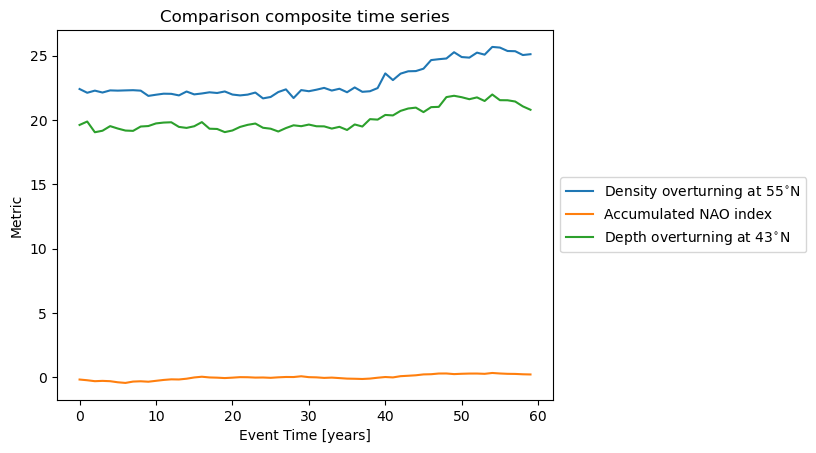

In [33]:
fig = plt.figure()

plt.plot(spg_dens_mean, label=r'Density overturning at 55$^{\circ}$N')

plt.plot(nao_mean, label=r'Accumulated NAO index')

plt.plot(dmoc_43N_mean, label=r'Depth overturning at 43$^{\circ}$N')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Comparison composite time series')
plt.xlabel('Event Time [years]')
plt.ylabel('Metric')
plt.show()